# Spotify Musical Attributes Analytics

In [57]:
# Import packages
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [58]:
# load dataset
df = pd.read_csv('spotify_top_songs_audio_features.csv')

In [59]:
# copy of the dataset
df_copy = df.copy()

## Quick Data Overview

In [60]:
# display first five rows
df.head()

,id,artist_names,track_name,source,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams
0,000xQL6tZNLJzIrtIgxqSl,"ZAYN, PARTYNEXTDOOR",Still Got Time (feat. PARTYNEXTDOOR),RCA Records Label,G,Major,4 beats,0.748,0.627,0.0639,0.13100,0.0,0.0852,0.524,-6.029,120.963,188491,17,107527761
1,003eoIwxETJujVWmNFMoZy,Alessia Cara,Growing Pains,Def Jam Recordings,C#/Db,Minor,4 beats,0.353,0.755,0.7330,0.08220,0.0,0.3900,0.437,-6.276,191.153,193680,2,9944865
2,003vvx7Niy0yvhvHt4a68B,The Killers,Mr. Brightside,Island Records,C#/Db,Major,4 beats,0.352,0.911,0.0747,0.00121,0.0,0.0995,0.236,-5.230,148.033,222973,125,512388123
3,00B7TZ0Xawar6NZ00JFomN,"Cardi B, Chance the Rapper",Best Life (feat. Chance The Rapper),Atlantic/KSR,A,Major,4 beats,0.620,0.625,0.5530,0.28700,0.0,0.3140,0.665,-7.438,167.911,284856,2,11985346
4,00Blm7zeNqgYLPtW6zg8cj,"Post Malone, The Weeknd",One Right Now (with The Weeknd),Republic Records,C#/Db,Major,4 beats,0.687,0.781,0.0530,0.03610,0.0,0.0755,0.688,-4.806,97.014,193507,30,301860377


In [61]:
# display shape of dataset
df.shape

(6513, 19)

In [62]:
# display information of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6513 entries, 0 to 6512
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                6513 non-null   object 
 1   artist_names      6513 non-null   object 
 2   track_name        6513 non-null   object 
 3   source            6513 non-null   object 
 4   key               6513 non-null   object 
 5   mode              6513 non-null   object 
 6   time_signature    6513 non-null   object 
 7   danceability      6513 non-null   float64
 8   energy            6513 non-null   float64
 9   speechiness       6513 non-null   float64
 10  acousticness      6513 non-null   float64
 11  instrumentalness  6513 non-null   float64
 12  liveness          6513 non-null   float64
 13  valence           6513 non-null   float64
 14  loudness          6513 non-null   float64
 15  tempo             6513 non-null   float64
 16  duration_ms       6513 non-null   int64  


In [63]:
# statistical summary of dataset
df.describe()

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams
count,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6.513000e+03
mean,0.681731,0.636522,0.121933,0.236761,0.012469,0.180168,0.492412,-6.350667,122.117244,202566.684170,13.614924,1.089647e+08
std,0.141787,0.164813,0.113441,0.244784,0.075151,0.138054,0.227001,2.536114,29.416097,49199.592333,24.084051,2.276695e+08
min,0.150000,0.021800,0.023200,0.000008,0.000000,0.019700,0.032000,-34.475000,46.718000,30133.000000,1.000000,2.525159e+06
25%,0.591000,0.534000,0.044000,0.044400,0.000000,0.097400,0.316000,-7.564000,98.007000,173038.000000,1.000000,8.695060e+06
50%,0.698000,0.651000,0.072200,0.145000,0.000000,0.124000,0.489000,-5.983000,120.034000,198367.000000,4.000000,2.712856e+07
75%,0.785000,0.759000,0.163000,0.356000,0.000041,0.219000,0.669000,-4.673000,142.025000,226003.000000,16.000000,9.951456e+07
max,0.985000,0.989000,0.966000,0.994000,0.953000,0.977000,0.982000,1.509000,212.117000,690732.000000,367.000000,3.528450e+09


# Impact of Mode Distribution on Danceability and Energy of Tracks

In [64]:
# display unique values of column Mode, which are Major and Minor
df['mode'].unique()

array(['Major', 'Minor'], dtype=object)

In [65]:
# Descriptive statistics summary of categorical variable Mode with continuous variables danceability and energy
descriptive_stats = df.groupby('mode')[['danceability', 'energy']].describe()
print(descriptive_stats)

      danceability                                                         \
             count      mean       std    min    25%    50%    75%    max   
mode                                                                        
Major       3747.0  0.670093  0.143502  0.184  0.577  0.683  0.774  0.985   
Minor       2766.0  0.697496  0.137898  0.150  0.618  0.720  0.797  0.980   

       energy                                                            
        count      mean       std     min     25%     50%    75%    max  
mode                                                                     
Major  3747.0  0.630617  0.169480  0.0279  0.5245  0.6460  0.758  0.988  
Minor  2766.0  0.644522  0.157948  0.0218  0.5490  0.6585  0.761  0.989  


- low variability for both danceability and energy

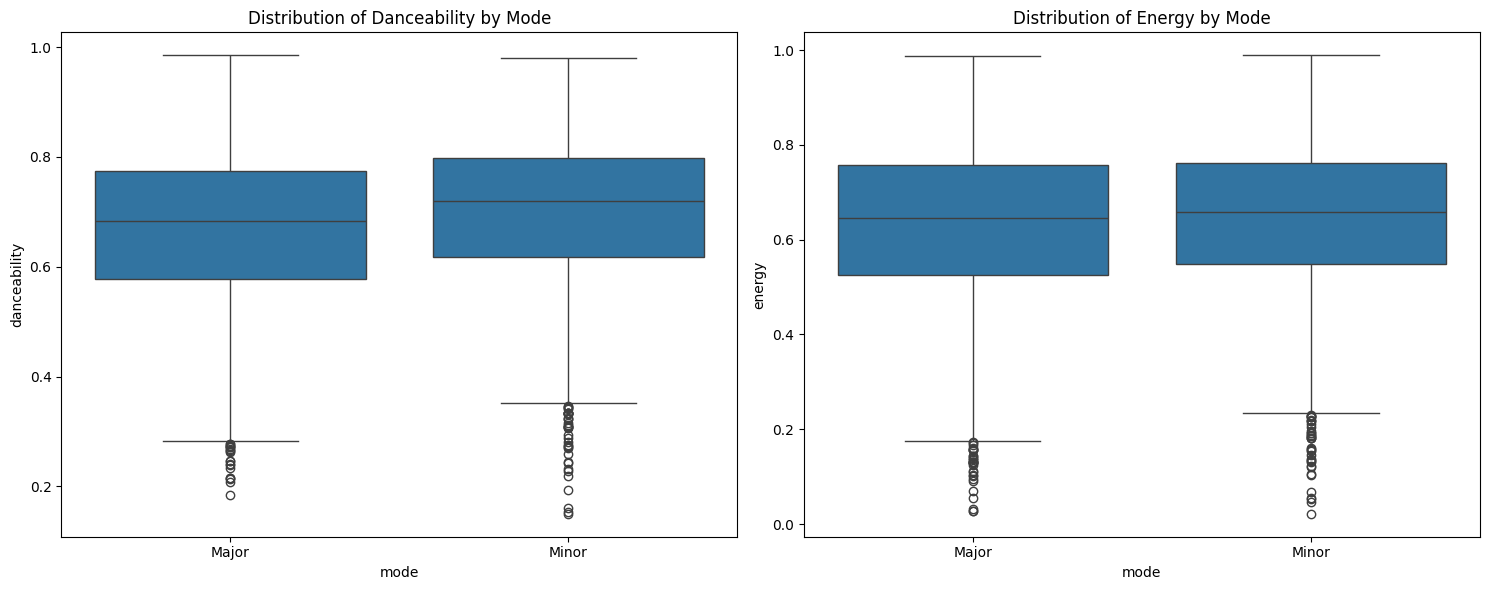

In [66]:
# Create a grid of plots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for Danceability
sns.boxplot(x='mode', y='danceability', data=df, ax=axes[0])
axes[0].set_title('Distribution of Danceability by Mode')

# Plot for Energy
sns.boxplot(x='mode', y='energy', data=df, ax=axes[1])
axes[1].set_title('Distribution of Energy by Mode')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [67]:
# Select danceability values for tracks in major mode
major_danceability = df[df['mode'] == 'Major']['danceability']
# Select danceability values for tracks in minor mode
minor_danceability = df[df['mode'] == 'Minor']['danceability']

# Select energy values for tracks in major mode
major_energy = df[df['mode'] == 'Major']['energy']
# Select energy values for tracks in minor mode
minor_energy = df[df['mode'] == 'Minor']['energy']

In [68]:
# Importing ttest_ind function from the scipy.stats module
from scipy.stats import ttest_ind

In [69]:
# Perform independent t-test to compare danceability between major and minor mode tracks
danceability_ttest = ttest_ind(major_danceability, minor_danceability)

# Perform independent t-test to compare energy between major and minor mode tracks
energy_ttest = ttest_ind(major_energy, minor_energy)

In [70]:
# Print T-test results for danceability
print("T-test results for danceability:")
print("Statistic:", danceability_ttest.statistic) # Print the t-statistic
print("P-value:", danceability_ttest.pvalue) # Print the p-value

# Print T-test results for energy
print("\nT-test results for energy:")
print("Statistic:", energy_ttest.statistic) # Print the t-statistic
print("P-value:", energy_ttest.pvalue) # Print the p-value

T-test results for danceability:
Statistic: -7.744768766320703
P-value: 1.103495960882396e-14

T-test results for energy:
Statistic: -3.368255555556431
P-value: 0.0007608431346636566


Energy 
- Since the p-value (0.00076) is less than the chosen significance level (typically 0.05), we reject the null hypothesis.
- Conclusion: There is a statistically significant difference in mean energy scores across the different modes.
- The statistically significant difference in energy across different modes suggests that the mode (major or minor) of a track has a significant impact on its energy level. Tracks in different modes exhibit distinct energy characteristics that are unlikely to occur by random chance alone.

Danceability
- Since the p-value (1.10e-14) is much less than the chosen significance level (typically 0.05), we reject the null hypothesis.
- Conclusion: There is a highly statistically significant difference in mean danceability scores across the different modes.
- The statistically significant difference in danceability across different modes suggests that the mode of a track influences its suitability for dancing. Tracks in different modes exhibit distinct danceability characteristics that are unlikely to occur by random chance alone.

In [71]:
# Importing sm function from the statsmodels.api module
import statsmodels.api as sm

# Perform linear regression for energy by mode
model_energy = sm.OLS.from_formula('energy ~ mode', data=df).fit()

# Perform linear regression for danceability by mode
model_danceability = sm.OLS.from_formula('danceability ~ mode', data=df).fit()

# print the linear regression results
print("Linear regression results for energy:")
print(model_energy.summary())


Linear regression results for energy:
                            OLS Regression Results                            
Dep. Variable:                 energy   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     11.35
Date:                Fri, 10 May 2024   Prob (F-statistic):           0.000761
Time:                        14:58:24   Log-Likelihood:                 2507.2
No. Observations:                6513   AIC:                            -5010.
Df Residuals:                    6511   BIC:                            -4997.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercep

- R-squared is 0.002, indicating that only 0.2% of the variance in energy is explained by the mode of the track. It means that the mode of the track (whether it's major or minor) accounts for a very small proportion of the variability observed in the energy levels of the tracks.
- Since the p-value (0.00) is less than the typical significance level of 0.05, we reject the null hypothesis. This indicates that the overall regression model is statistically significant. In other words, the coefficient for "mode" is unlikely to be zero, suggesting that mode indeed has an impact on energy. Otherwise, when we say that a predictor (independent) variable has a non-zero effect on the target (dependent) variable in a regression model, it means that changes in the predictor variable are associated with changes in the target variable. In this case, the predictor variable "mode" does not have a non-zero effect on the target variable "energy".
- The coefficient 0.6306 represents the expected value of the target variable (energy) when all predictor variables are zero. This coefficient value indicates that when the mode is not specified (neither major nor minor), the expected value of energy is 0.6306.
- The coefficient 0.0139 represents the difference in the expected value of the target variable (energy) between the two categories of the mode variable: major and minor. In this case, the coefficient is positive (0.0139), indicating that when the mode is minor (compared to major, which is the reference category), the expected value of energy increases by 0.0139.

In [72]:
# linear regression results for danceability 
print("\nLinear regression results for danceability:")
print(model_danceability.summary())


Linear regression results for danceability:
                            OLS Regression Results                            
Dep. Variable:           danceability   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     59.98
Date:                Fri, 10 May 2024   Prob (F-statistic):           1.10e-14
Time:                        14:58:24   Log-Likelihood:                 3511.5
No. Observations:                6513   AIC:                            -7019.
Df Residuals:                    6511   BIC:                            -7005.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
I

- R-squared is 0.009, indicating that only 0.9% of the variance in danceability is explained by the mode of the track. It means that the mode of the track (whether it's major or minor) accounts for a very small proportion of the variability observed in the danceability levels of the tracks.
- Since the p-value (0.00) is less than the typical significance level of 0.05, we reject the null hypothesis. This indicates that the overall regression model is statistically significant. In other words, the coefficient for "mode" is unlikely to be zero, suggesting that mode indeed has an impact on danceability. Otherwise, when we say that a predictor (independent) variable has a non-zero effect on the target (dependent) variable in a regression model, it means that changes in the predictor variable are associated with changes in the target variable. In this case, the predictor variable "mode" does not have a non-zero effect on the target variable "danceability".
- When the mode is not specified (neither major nor minor), the expected value of danceability is 0.6701.
- The coefficient 0.0274 represents the difference in the expected value of the target variable (danceability) between the two categories of the mode variable: major and minor. In this case, the coefficient is positive (0.0274), indicating that when the mode is minor (compared to major, which is the reference category), the expected value of danceability increases by 0.0274.

# Correlation Between Tempo and Danceability

In [73]:
# Descriptive statistics for tempo
tempo_desc = df['tempo'].describe()

print("Descriptive Statistics for Tempo:")
print(tempo_desc)

# Descriptive statistics for danceability
danceability_desc = df['danceability'].describe()

print("\nDescriptive Statistics for Danceability:")
print(danceability_desc)

Descriptive Statistics for Tempo:
count    6513.000000
mean      122.117244
std        29.416097
min        46.718000
25%        98.007000
50%       120.034000
75%       142.025000
max       212.117000
Name: tempo, dtype: float64

Descriptive Statistics for Danceability:
count    6513.000000
mean        0.681731
std         0.141787
min         0.150000
25%         0.591000
50%         0.698000
75%         0.785000
max         0.985000
Name: danceability, dtype: float64


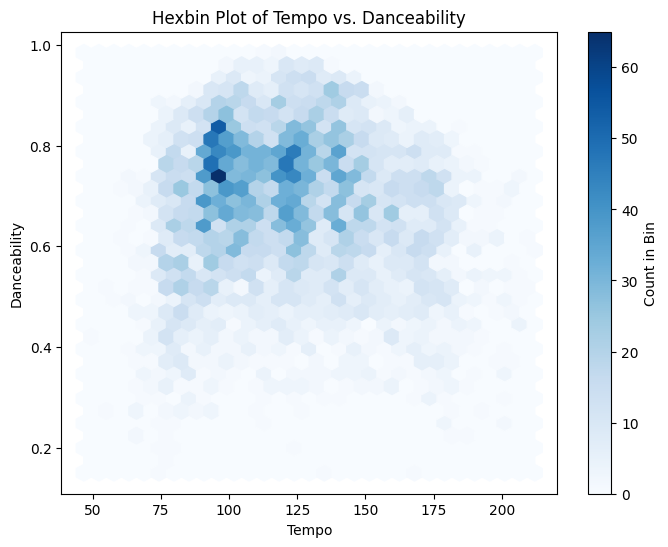

In [74]:
# hexbin plot for tempo and danceability
plt.figure(figsize=(8, 6))
plt.hexbin(df['tempo'], df['danceability'], gridsize=30, cmap='Blues')
plt.colorbar(label='Count in Bin')
plt.title('Hexbin Plot of Tempo vs. Danceability')
plt.xlabel('Tempo')
plt.ylabel('Danceability')
plt.show()


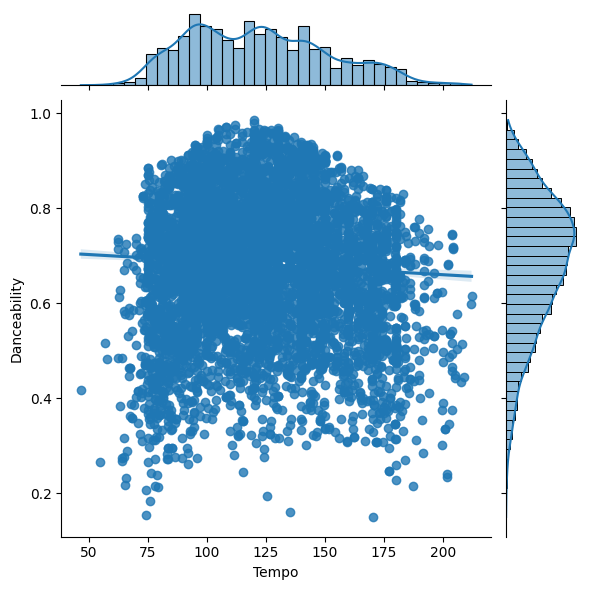

In [76]:
# joint plot for tempo and danceability
sns.jointplot(x='tempo', y='danceability', data=df, kind='reg')
plt.xlabel('Tempo')
plt.ylabel('Danceability')
plt.show()

In [ ]:
# import the pearsonr function from scipy.stats
from scipy.stats import pearsonr

# Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(df['tempo'], df['danceability'])

print("Pearson Correlation Coefficient between Tempo and Danceability:", correlation_coefficient)
print("P-value:", p_value)

Pearson Correlation Coefficient between Tempo and Danceability: -0.058746769488179
P-value: 2.0929327289377837e-06


- The correlation coefficient of -0.0587 indicates a weak negative linear relationship between tempo and danceability. While the relationship exists, it is weak and close to zero, suggesting only a slight association between the two variables.
- The p-value (2.09e-06) is much smaller than the typical significance level of 0.05, indicating a statistically significant correlation between tempo and danceability. Therefore, we reject the null hypothesis of no correlation.
- While the statistical analysis confirms a significant relationship between tempo and danceability, it's essential to note that correlation does not imply causation. The direction of causality between tempo and danceability cannot be determined solely based on this analysis.

# Correlation Between Loudness and Energy

In [ ]:
# Descriptive statistics for loudness
loudness_desc = df['loudness'].describe()

print("Descriptive Statistics for Loudness:")
print(tempo_desc)

# Descriptive statistics for energy
danceability_desc = df['energy'].describe()

print("\nDescriptive Statistics for Energy:")
print(danceability_desc)

Descriptive Statistics for Loudness:
count    6513.000000
mean      122.117244
std        29.416097
min        46.718000
25%        98.007000
50%       120.034000
75%       142.025000
max       212.117000
Name: tempo, dtype: float64

Descriptive Statistics for Energy:
count    6513.000000
mean        0.636522
std         0.164813
min         0.021800
25%         0.534000
50%         0.651000
75%         0.759000
max         0.989000
Name: energy, dtype: float64


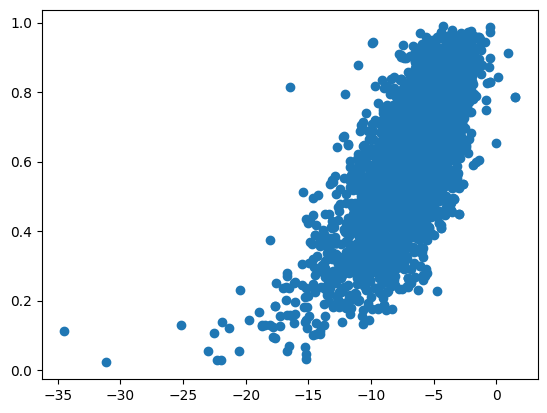

In [ ]:
# scatter plot of loudness and energy
plt.scatter(df['loudness'], df['energy'])
plt.show()

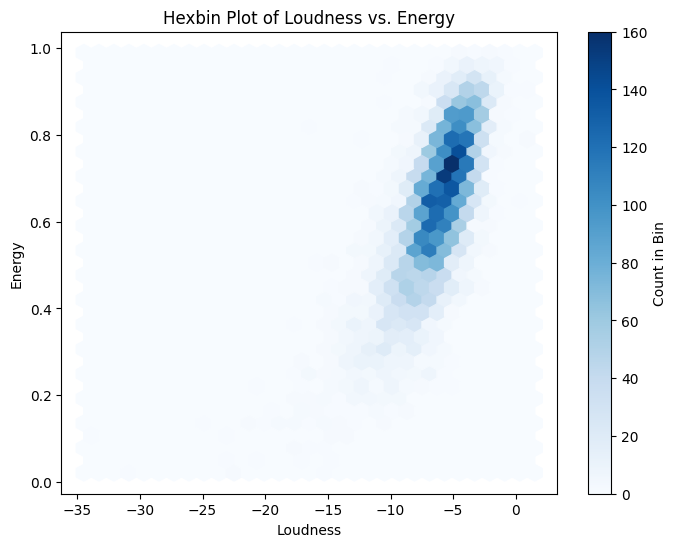

In [ ]:
# hexbin plot of loudness and energy
plt.figure(figsize=(8, 6))
plt.hexbin(df['loudness'], df['energy'], gridsize=30, cmap='Blues')
plt.colorbar(label='Count in Bin')
plt.title('Hexbin Plot of Loudness vs. Energy')
plt.xlabel('Loudness')
plt.ylabel('Energy')
plt.show()


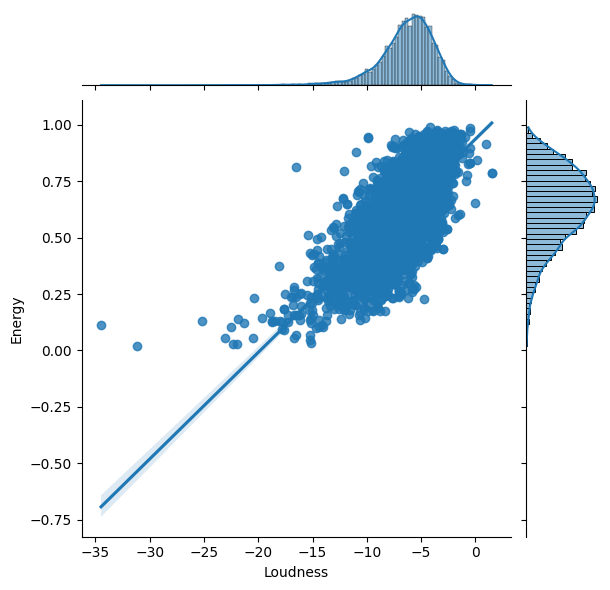

In [ ]:
# join plot of loudness and energy
sns.jointplot(x='loudness', y='energy', data=df, kind='reg')
plt.xlabel('Loudness')
plt.ylabel('Energy')
plt.show()

In [ ]:
# Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(df['loudness'], df['energy'])

print("Pearson Correlation Coefficient between Loudness and Energy:", correlation_coefficient)
print("P-value:", p_value)

Pearson Correlation Coefficient between Loudness and Energy: 0.7273789658383438
P-value: 0.0


- The correlation coefficient of 0.73 indicates a strong positive linear relationship between loudness and energy. This means there is a strong association between the two variables.
- The p-value (0.0) is smaller than the typical significance level of 0.05, indicating a statistically significant correlation between loudness and energy. Therefore, we reject the null hypothesis of no correlation.
- It's important to remember that correlation does not imply causation, so caution should be exercised when interpreting the relationship between these variables solely based on this analysis.

# Correlation of High Energy and High Danceability

In [ ]:
# Descriptive statistics for energy
energy_desc = df['energy'].describe()

print("Descriptive Statistics for Energy:")
print(energy_desc)

# Descriptive statistics for danceability
danceability_desc = df['danceability'].describe()

print("\nDescriptive Statistics for Danceability:")
print(danceability_desc)

Descriptive Statistics for Energy:
count    6513.000000
mean        0.636522
std         0.164813
min         0.021800
25%         0.534000
50%         0.651000
75%         0.759000
max         0.989000
Name: energy, dtype: float64

Descriptive Statistics for Danceability:
count    6513.000000
mean        0.681731
std         0.141787
min         0.150000
25%         0.591000
50%         0.698000
75%         0.785000
max         0.985000
Name: danceability, dtype: float64


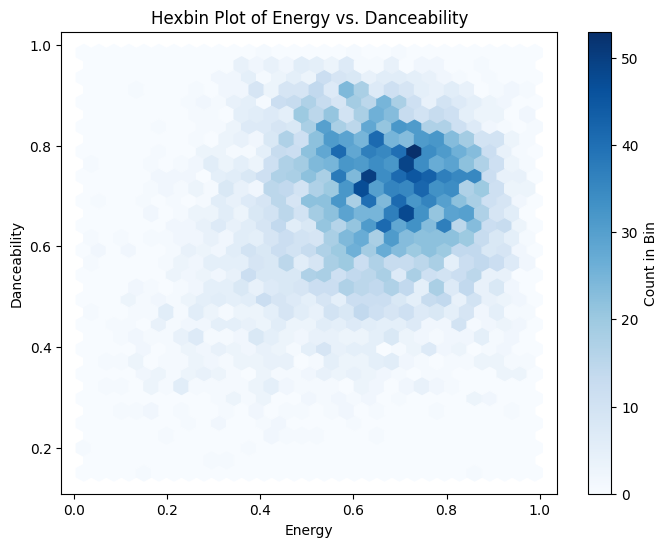

In [ ]:
# scatter plot of energy and danceability
plt.figure(figsize=(8, 6))
plt.hexbin(df['energy'], df['danceability'], gridsize=30, cmap='Blues')
plt.colorbar(label='Count in Bin')
plt.title('Hexbin Plot of Energy vs. Danceability')
plt.xlabel('Energy')
plt.ylabel('Danceability')
plt.show()

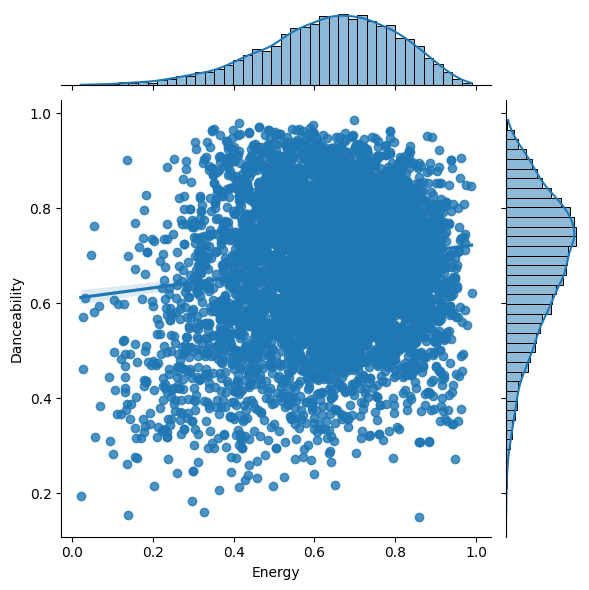

In [ ]:
# joint plot of energy and loudness
sns.jointplot(x='energy', y='danceability', data=df, kind='reg')
plt.xlabel('Energy')
plt.ylabel('Danceability')
plt.show()

In [ ]:
# Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(df['energy'], df['danceability'])

print("Pearson Correlation Coefficient between Energy and Danceability:", correlation_coefficient)
print("P-value:", p_value)

Pearson Correlation Coefficient between Energy and Danceability: 0.1323974433136976
P-value: 7.35112561567457e-27


- The correlation coefficient of 0.13 suggests a weak positive linear relationship between energy and danceability. While the relationship exists, it is not very strong.
- The p-value of 7.35e-27 is much smaller than the typical significance level of 0.05, indicating a statistically significant correlation between energy and danceability. Therefore, we reject the null hypothesis of no correlation.

# Correlation of High Valence and High Danceability

In [ ]:
# Descriptive statistics for valence
valence_desc = df['valence'].describe()

print("Descriptive Statistics for Valence:")
print(valence_desc)

# Descriptive statistics for danceability
danceability_desc = df['danceability'].describe()

print("\nDescriptive Statistics for Danceability:")
print(danceability_desc)

Descriptive Statistics for Valence:
count    6513.000000
mean        0.492412
std         0.227001
min         0.032000
25%         0.316000
50%         0.489000
75%         0.669000
max         0.982000
Name: valence, dtype: float64

Descriptive Statistics for Danceability:
count    6513.000000
mean        0.681731
std         0.141787
min         0.150000
25%         0.591000
50%         0.698000
75%         0.785000
max         0.985000
Name: danceability, dtype: float64


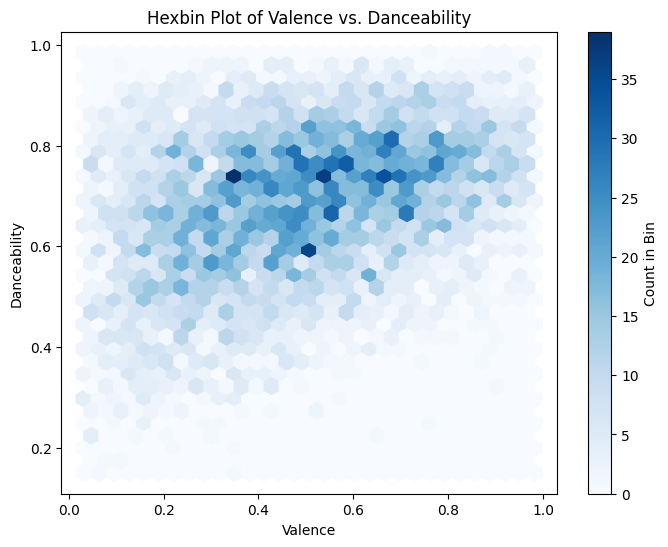

In [ ]:
# hexbin plot of valence and danceability
plt.figure(figsize=(8, 6))
plt.hexbin(df['valence'], df['danceability'], gridsize=30, cmap='Blues')
plt.colorbar(label='Count in Bin')
plt.title('Hexbin Plot of Valence vs. Danceability')
plt.xlabel('Valence')
plt.ylabel('Danceability')
plt.show()

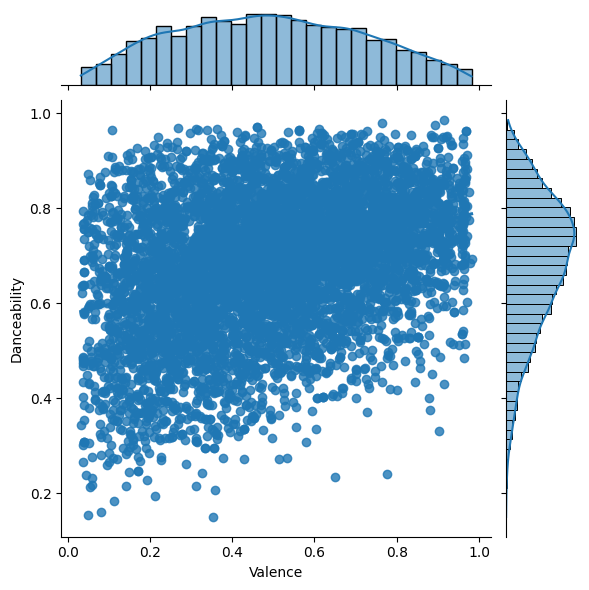

In [ ]:
# joint plot of valence and danceability
sns.jointplot(x='valence', y='danceability', data=df, kind='reg')
plt.xlabel('Valence')
plt.ylabel('Danceability')
plt.show()

In [ ]:
# Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(df['valence'], df['danceability'])

print("Pearson Correlation Coefficient between Valence and Danceability:", correlation_coefficient)
print("P-value:", p_value)

Pearson Correlation Coefficient between Valence and Danceability: 0.3465967687128238
P-value: 3.2384763634523125e-183


- The correlation coefficient of 0.35 suggests a moderate positive linear relationship between valence and danceability. This means there is a moderate association between the two variables.
- The p-value of 3.24e-183 is much smaller than the typical significance level of 0.05, indicating a statistically significant correlation between valence and danceability. Therefore, we reject the null hypothesis of no correlation.

# Variance of Tempo Across Different Levels of Valence

In [ ]:
# Descriptive statistics for tempo
tempo_desc = df['tempo'].describe()

print("\nDescriptive Statistics for Tempo:")
print(tempo_desc)

# Descriptive statistics for energy
valence_desc = df['valence'].describe()

print("Descriptive Statistics for Valence:")
print(valence_desc)


Descriptive Statistics for Tempo:
count    6513.000000
mean      122.117244
std        29.416097
min        46.718000
25%        98.007000
50%       120.034000
75%       142.025000
max       212.117000
Name: tempo, dtype: float64
Descriptive Statistics for Valence:
count    6513.000000
mean        0.492412
std         0.227001
min         0.032000
25%         0.316000
50%         0.489000
75%         0.669000
max         0.982000
Name: valence, dtype: float64


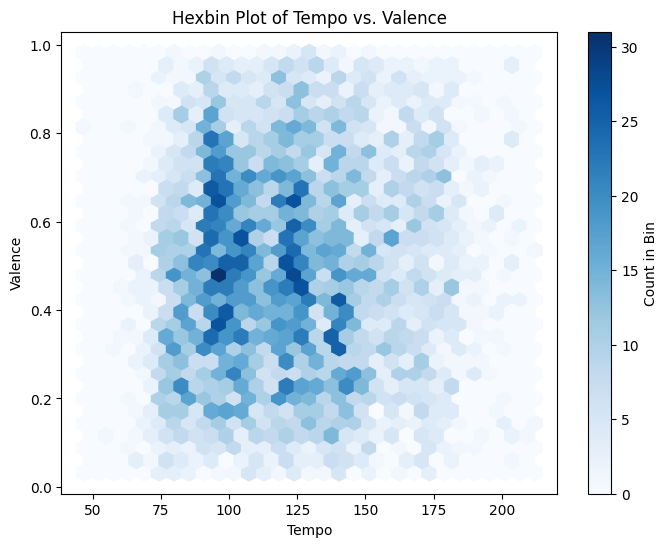

In [ ]:
# hexbin plot of tempo and valence
plt.figure(figsize=(8, 6))
plt.hexbin(df['tempo'], df['valence'], gridsize=30, cmap='Blues')
plt.colorbar(label='Count in Bin')
plt.title('Hexbin Plot of Tempo vs. Valence')
plt.xlabel('Tempo')
plt.ylabel('Valence')
plt.show()

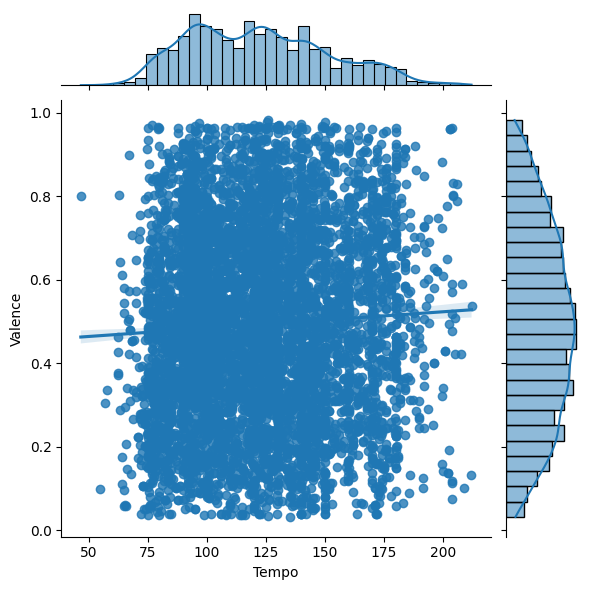

In [ ]:
# joint plot of tempo and valence
sns.jointplot(x='tempo', y='valence', data=df, kind='reg')
plt.xlabel('Tempo')
plt.ylabel('Valence')
plt.show()

In [ ]:
# Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(df['tempo'], df['valence'])

print("Pearson Correlation Coefficient between Tempo and Valence:", correlation_coefficient)
print("P-value:", p_value)

Pearson Correlation Coefficient between Tempo and Valence: 0.051096894367575786
P-value: 3.6979472562134585e-05


- The correlation coefficient of 0.05 suggests a weak positive linear relationship between tempo and valence. While the relationship exists, it is weak and close to zero, suggesting only a slight association between the two variables.
- The p-value of 3.70e-05 is much smaller than the typical significance level of 0.05, indicating a statistically significant correlation between tempo and valence. Therefore, we reject the null hypothesis of no correlation.

# Impact of Speechiness on Energy and Danceability of Tracks

In [ ]:
# Descriptive statistics for speechiness
speechiness_desc = df['speechiness'].describe()

print("Descriptive Statistics for Speechiness:")
print(speechiness_desc)

# Descriptive statistics for energy
energy_desc = df['energy'].describe()

print("\nDescriptive Statistics for Energy:")
print(energy_desc)


Descriptive Statistics for Speechiness:
count    6513.000000
mean        0.121933
std         0.113441
min         0.023200
25%         0.044000
50%         0.072200
75%         0.163000
max         0.966000
Name: speechiness, dtype: float64

Descriptive Statistics for Energy:
count    6513.000000
mean        0.636522
std         0.164813
min         0.021800
25%         0.534000
50%         0.651000
75%         0.759000
max         0.989000
Name: energy, dtype: float64


In [ ]:
# Descriptive statistics for danceability
danceability_desc = df['danceability'].describe()

print("\nDescriptive Statistics for Danceability:")
print(danceability_desc)


Descriptive Statistics for Danceability:
count    6513.000000
mean        0.681731
std         0.141787
min         0.150000
25%         0.591000
50%         0.698000
75%         0.785000
max         0.985000
Name: danceability, dtype: float64


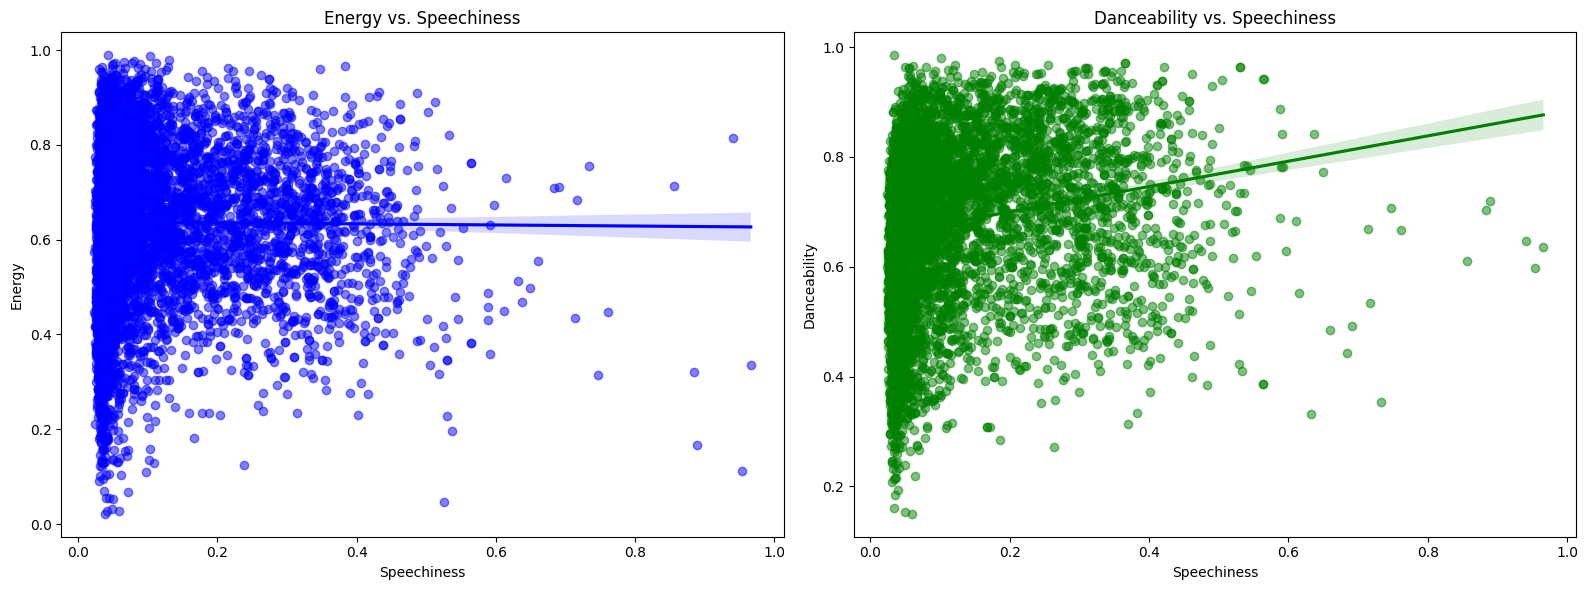

In [ ]:
# Create a figure with two subplots in one row
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot with regression line for energy vs. speechiness
sns.regplot(x='speechiness', y='energy', data=df, scatter_kws={'alpha':0.5}, color='blue', ax=axes[0])
axes[0].set_title('Energy vs. Speechiness')
axes[0].set_xlabel('Speechiness')
axes[0].set_ylabel('Energy')

# Scatter plot with regression line for danceability vs. speechiness
sns.regplot(x='speechiness', y='danceability', data=df, scatter_kws={'alpha':0.5}, color='green', ax=axes[1])
axes[1].set_title('Danceability vs. Speechiness')
axes[1].set_xlabel('Speechiness')
axes[1].set_ylabel('Danceability')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

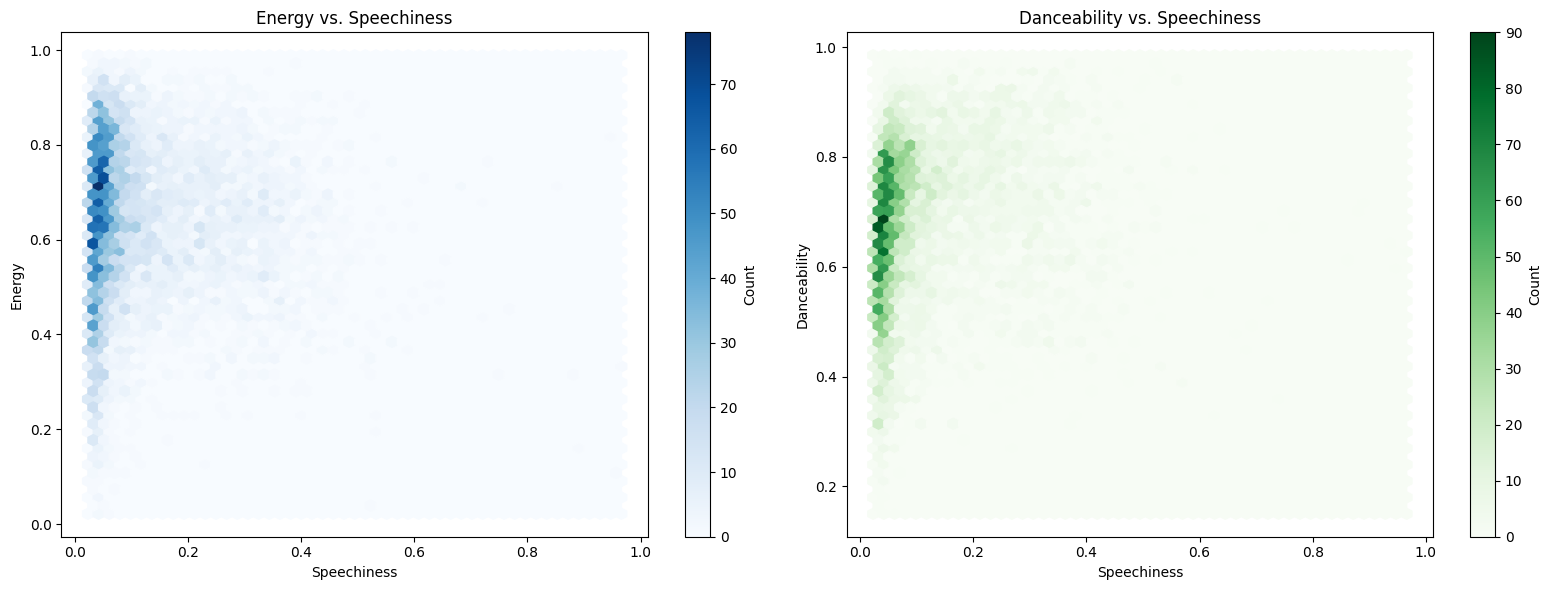

In [ ]:
# Create a figure with two subplots in one row
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Hexbin plot for energy vs. speechiness
hb1 = axes[0].hexbin(x=df['speechiness'], y=df['energy'], gridsize=50, cmap='Blues')
axes[0].set_title('Energy vs. Speechiness')
axes[0].set_xlabel('Speechiness')
axes[0].set_ylabel('Energy')
plt.colorbar(hb1, ax=axes[0], label='Count')

# Hexbin plot for danceability vs. speechiness
hb2 = axes[1].hexbin(x=df['speechiness'], y=df['danceability'], gridsize=50, cmap='Greens')
axes[1].set_title('Danceability vs. Speechiness')
axes[1].set_xlabel('Speechiness')
axes[1].set_ylabel('Danceability')
plt.colorbar(hb2, ax=axes[1], label='Count')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
# Define the independent variable (X) and dependent variable (y)
X = df['speechiness']  # Independent variable: speechiness
y = df['energy']       # Dependent variable: energy (or danceability)

# Add a constant to the independent variable (X) to include an intercept term in the model
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 energy   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4018
Date:                Fri, 10 May 2024   Prob (F-statistic):              0.526
Time:                        13:51:10   Log-Likelihood:                 2501.7
No. Observations:                6513   AIC:                            -4999.
Df Residuals:                    6511   BIC:                            -4986.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.6379      0.003    212.750      

- The R-squared value is 0.000, indicating that speechiness explains none of the variance in energy.
- Adjusted R-squared is similar to R-squared but adjusted for the number of independent variables in the model. A negative value (-0.000) suggests that adding speechiness to the model does not improve its explanatory power.
- Since the p-value (0.526) is greater than the typical significance level of 0.05, we fail to reject the null hypothesis that all regression coefficients are equal to zero. This indicates that the overall regression model is not statistically significant. In other words, there is insufficient evidence to conclude that tracks with higher speechiness have significantly different energy levels compared to tracks with lower speechiness.
- Conclusion: You cannot confidently state that speechiness has a statistically significant effect on the energy level of tracks.
- The coefficient for the constant term (intercept) is 0.6379. This represents the estimated value of energy when speechiness is zero.
- The coefficient for speechiness is -0.0114. This indicates the estimated change in energy for a one-unit increase in speechiness. However, since the p-value (P>|t|) associated with speechiness is 0.526, we cannot conclude that this coefficient is statistically significant.

In [ ]:
# Define the independent variable (X) and dependent variable (y)
X = df['speechiness']  # Independent variable: speechiness
y = df['danceability']       # Dependent variable: energy (or danceability)

# Add a constant to the independent variable (X) to include an intercept term in the model
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           danceability   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     229.6
Date:                Fri, 10 May 2024   Prob (F-statistic):           5.24e-51
Time:                        13:51:10   Log-Likelihood:                 3594.5
No. Observations:                6513   AIC:                            -7185.
Df Residuals:                    6511   BIC:                            -7171.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.6536      0.003    257.802      

- The R-squared value is 0.034, indicating that speechiness explains 3.4% of the variance in danceability. In other words, it predict 3.4% of the observed variability in the danceability.
- Since the p-value (0.00) is less than the typical significance level of 0.05, we reject the null hypothesis. This indicates that the overall regression model is statistically significant. In other words, the coefficient for "speechiness" is unlikely to be zero, suggesting that speechiness indeed has an impact on danceability.
- The coefficient for the constant term (intercept) is 0.6536. This represents the estimated value of energy when speechiness is zero.
- The coefficient for speechiness is 0.2307. This indicates the estimated change in energy for a one-unit increase in speechiness. This coefficient is statistically significant, as indicated by the low p-value (0.000).

# Relationship Between Acoustiness and Instrumentalness

In [ ]:
# Descriptive statistics for acousticness
acousticness_stats = df['acousticness'].describe()

# Descriptive statistics for instrumentalness
instrumentalness_stats = df['instrumentalness'].describe()

print("Descriptive statistics for acousticness:")
print(acousticness_stats)
print("\nDescriptive statistics for instrumentalness:")
print(instrumentalness_stats)

Descriptive statistics for acousticness:
count    6513.000000
mean        0.236761
std         0.244784
min         0.000008
25%         0.044400
50%         0.145000
75%         0.356000
max         0.994000
Name: acousticness, dtype: float64

Descriptive statistics for instrumentalness:
count    6513.000000
mean        0.012469
std         0.075151
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000041
max         0.953000
Name: instrumentalness, dtype: float64


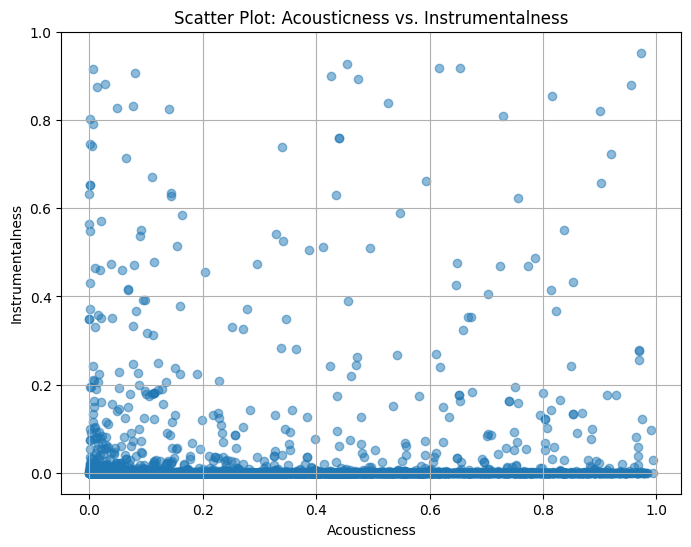

In [ ]:
# Scatter plot of acoustiness and instrumentalness
plt.figure(figsize=(8, 6))
plt.scatter(df['acousticness'], df['instrumentalness'], alpha=0.5)
plt.title('Scatter Plot: Acousticness vs. Instrumentalness')
plt.xlabel('Acousticness')
plt.ylabel('Instrumentalness')
plt.grid(True)
plt.show()

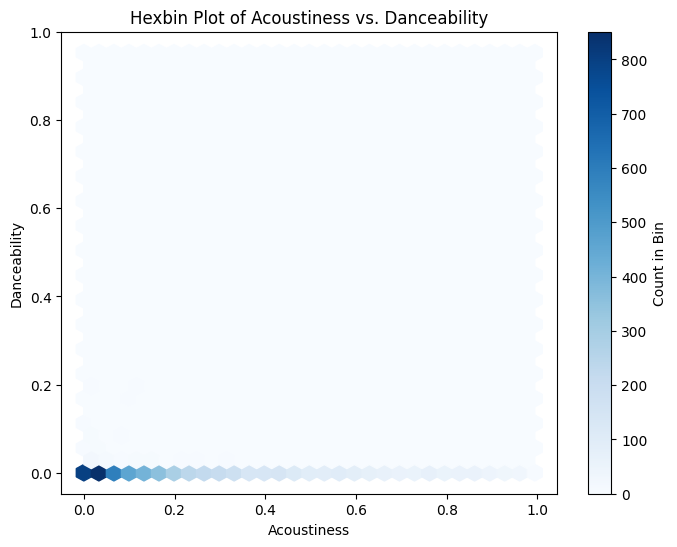

In [78]:
# Hexbin plot of acoustiness and instrumentalness
plt.figure(figsize=(8, 6))
plt.hexbin(df['acousticness'], df['instrumentalness'], gridsize=30, cmap='Blues')
plt.colorbar(label='Count in Bin')
plt.title('Hexbin Plot of Acoustiness vs. Danceability')
plt.xlabel('Acoustiness')
plt.ylabel('Danceability')
plt.show()

In [ ]:
# Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(df['acousticness'], df['instrumentalness'])

print("Pearson Correlation Coefficient between Acousticness and Instrumentalness:", correlation_coefficient)
print("P-value:", p_value)

Pearson Correlation Coefficient between Acousticness and Instrumentalness: 0.06398369736703416
P-value: 2.3662350515443808e-07


- The correlation coefficient of 0.064 indicates a weak positive linear relationship between acousticness and instrumentalness. While the relationship exists, it is weak and close to zero, suggesting only a slight association between the two variables.
- The p-value (2.37e-07) is much smaller than the typical significance level of 0.05, indicating a statistically significant correlation between acousticness and instrumentalness. Therefore, we reject the null hypothesis of no correlation.
- While the statistical analysis confirms a significant relationship between acousticness and instrumentalness, it's essential to note that correlation does not imply causation. The direction of causality between acousticness and instrumentalness cannot be determined solely based on this analysis.

# Comparing Loudness Levels: Acoustic vs. Non-Acoustic Tracks

In [ ]:
# Descriptive statistics for acousticness
acousticness_stats = df['acousticness'].describe()

# Descriptive statistics for loudness
loudness_stats = df['loudness'].describe()

print("Descriptive statistics for acousticness:")
print(acousticness_stats)
print("\nDescriptive statistics for loudness:")
print(loudness_stats)

Descriptive statistics for acousticness:
count    6513.000000
mean        0.236761
std         0.244784
min         0.000008
25%         0.044400
50%         0.145000
75%         0.356000
max         0.994000
Name: acousticness, dtype: float64

Descriptive statistics for loudness:
count    6513.000000
mean       -6.350667
std         2.536114
min       -34.475000
25%        -7.564000
50%        -5.983000
75%        -4.673000
max         1.509000
Name: loudness, dtype: float64


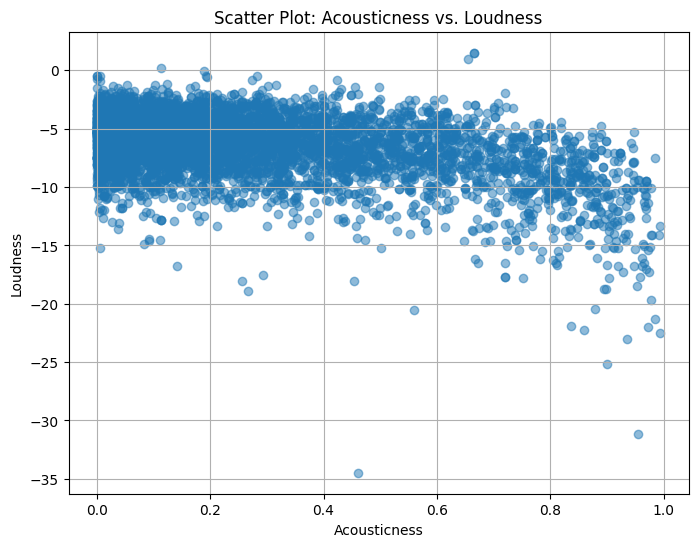

In [ ]:
# Scatter plot of acoustiness and loudness
plt.figure(figsize=(8, 6))
plt.scatter(df['acousticness'], df['loudness'], alpha=0.5)
plt.title('Scatter Plot: Acousticness vs. Loudness')
plt.xlabel('Acousticness')
plt.ylabel('Loudness')
plt.grid(True)
plt.show()

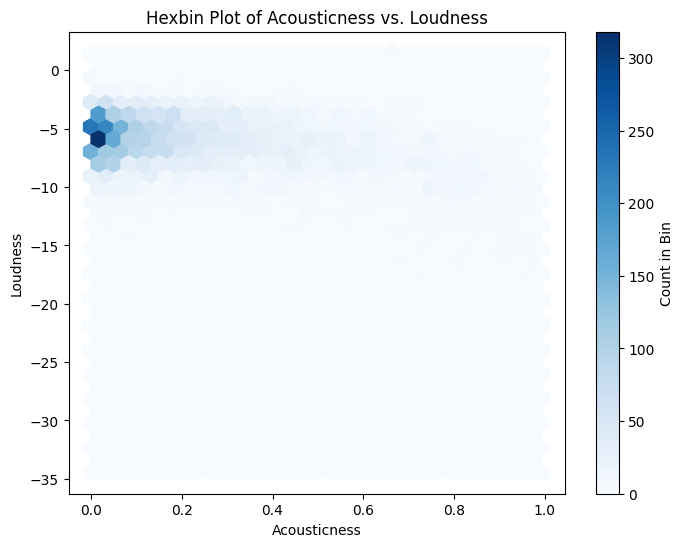

In [ ]:
# Hexbin plot of acoustiness and loudness
plt.figure(figsize=(8, 6))
plt.hexbin(df['acousticness'], df['loudness'], gridsize=30, cmap='Blues')
plt.colorbar(label='Count in Bin')
plt.title('Hexbin Plot of Acousticness vs. Loudness')
plt.xlabel('Acousticness')
plt.ylabel('Loudness')
plt.show()

In [ ]:
# Define a threshold value to classify tracks as acoustic or non-acoustic
threshold = 0.5

# Subset the DataFrame for acoustic and non-acoustic tracks
acoustic_tracks = df[df['acousticness'] >= threshold]['loudness']
non_acoustic_tracks = df[df['acousticness'] < threshold]['loudness']

# Perform the t-test
t_statistic, p_value = ttest_ind(acoustic_tracks, non_acoustic_tracks)

# Print the results
print("T-test results for loudness:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-test results for loudness:
T-statistic: -33.552312153588275
P-value: 8.51610945608389e-228


Loudness:
- Since the p-value (8.52e-228) is much less than the chosen significance level (typically 0.05), we reject the null hypothesis.
- Conclusion: There is a statistically significant difference in mean loudness levels between acoustic and non-acoustic tracks.
- The statistically significant difference in loudness between acoustic and non-acoustic tracks suggests that the acoustic nature of a track (acoustic or non-acoustic) has a significant impact on its loudness. Tracks with different acoustic characteristics exhibit distinct loudness levels that are unlikely to occur by random chance alone.

# Association Between Liveness Values and Musical Characteristics

In [ ]:
# Descriptive statistics for liveness
liveness_stats = df['liveness'].describe()

# Descriptive statistics for tempo
tempo_stats = df['tempo'].describe()

print("Descriptive statistics for liveness:")
print(liveness_stats)
print("\nDescriptive statistics for tempo:")
print(tempo_stats)


Descriptive statistics for liveness:
count    6513.000000
mean        0.180168
std         0.138054
min         0.019700
25%         0.097400
50%         0.124000
75%         0.219000
max         0.977000
Name: liveness, dtype: float64

Descriptive statistics for tempo:
count    6513.000000
mean      122.117244
std        29.416097
min        46.718000
25%        98.007000
50%       120.034000
75%       142.025000
max       212.117000
Name: tempo, dtype: float64


In [ ]:
# Descriptive statistics for energy
energy_stats = df['energy'].describe()

# Descriptive statistics for valence
valence_stats = df['valence'].describe()

print("\nDescriptive statistics for energy:")
print(energy_stats)
print("\nDescriptive statistics for valence:")
print(valence_stats)


Descriptive statistics for energy:
count    6513.000000
mean        0.636522
std         0.164813
min         0.021800
25%         0.534000
50%         0.651000
75%         0.759000
max         0.989000
Name: energy, dtype: float64

Descriptive statistics for valence:
count    6513.000000
mean        0.492412
std         0.227001
min         0.032000
25%         0.316000
50%         0.489000
75%         0.669000
max         0.982000
Name: valence, dtype: float64


In [91]:
# Descriptive statistics for danceability
danceability_stats = df['danceability'].describe()

# Descriptive statistics for speechiness
speechiness_stats = df['speechiness'].describe()

print("\nDescriptive statistics for danceability:")
print(danceability_stats)
print("\nDescriptive statistics for speechiness:")
print(speechiness_stats)


Descriptive statistics for danceability:
count    6513.000000
mean        0.681731
std         0.141787
min         0.150000
25%         0.591000
50%         0.698000
75%         0.785000
max         0.985000
Name: danceability, dtype: float64

Descriptive statistics for speechiness:
count    6513.000000
mean        0.121933
std         0.113441
min         0.023200
25%         0.044000
50%         0.072200
75%         0.163000
max         0.966000
Name: speechiness, dtype: float64


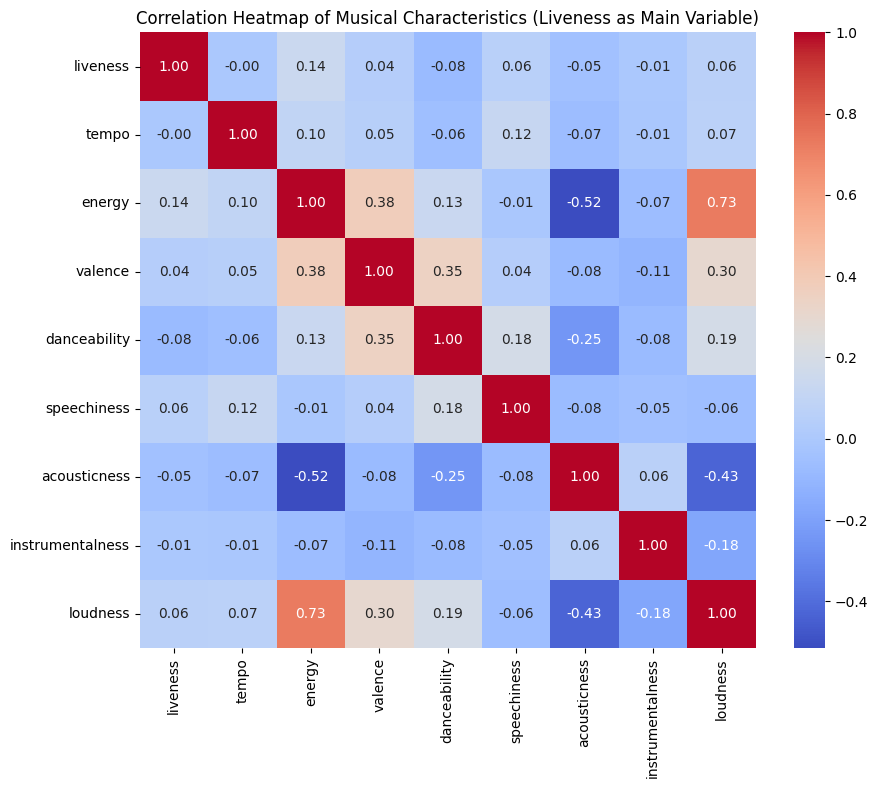

In [87]:
# Selecting the columns of interest with liveness as the main variable
columns_of_interest = ['liveness', 'tempo', 'energy', 'valence', 'danceability', 'speechiness', 'acousticness', 'instrumentalness', 'loudness']
data_of_interest = df[columns_of_interest]

# Calculating the correlation matrix
correlation_matrix = data_of_interest.corr()

# Creating the heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap of Musical Characteristics (Liveness as Main Variable)')
plt.show()

In [90]:
# Calculate Pearson correlation coefficient and p-value for liveness and all continuous musical variables
correlation_coefficient, p_value = pearsonr(df['liveness'], df['tempo'])
print("P-value of Liveness and Tempo:", p_value)

correlation_coefficient, p_value = pearsonr(df['liveness'], df['energy'])
print("P-value of Liveness and Energy:", p_value)

correlation_coefficient, p_value = pearsonr(df['liveness'], df['valence'])
print("P-value of Liveness and Valence:", p_value)

correlation_coefficient, p_value = pearsonr(df['liveness'], df['danceability'])
print("P-value of Liveness and Danceability:", p_value)

correlation_coefficient, p_value = pearsonr(df['liveness'], df['speechiness'])
print("P-value of Liveness and Speechiness:", p_value)

correlation_coefficient, p_value = pearsonr(df['liveness'], df['acousticness'])
print("P-value of Liveness and Acoustiness:", p_value)

correlation_coefficient, p_value = pearsonr(df['liveness'], df['instrumentalness'])
print("P-value of Liveness and Instrumentalness:", p_value)

correlation_coefficient, p_value = pearsonr(df['liveness'], df['loudness'])
print("P-value of Liveness and Loudness:", p_value)




P-value of Liveness and Tempo: 0.8503807354618941
P-value of Liveness and Energy: 2.953206957467255e-28
P-value of Liveness and Valence: 0.003238623942624121
P-value of Liveness and Danceability: 5.3244100907045505e-11
P-value of Liveness and Speechiness: 8.811979057213719e-06
P-value of Liveness and Acoustiness: 0.00024623743321583886
P-value of Liveness and Instrumentalness: 0.6702895959284668
P-value of Liveness and Loudness: 1.7982908228108182e-06
